# Face Detection using Haar cascade 

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

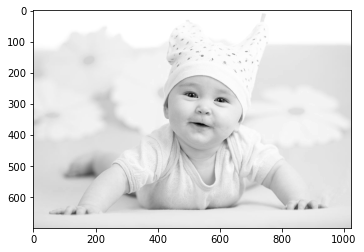

In [2]:
#  Loading the image to be tested
test_image = cv2.imread('C:/Users/shch/Desktop/Face detection/baby1.jpg')

# Converting to grayscale as opencv expects detector takes in input gray scale images
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying grayscale image
plt.imshow(test_image_gray, cmap='gray')


### Since OpenCV loads an image in BGR format so we need to convert it into RGB format to be able to display its true colours. 

In [3]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
haar_cascade_face = cv2.CascadeClassifier('C:/Users/shch/Desktop/Face detection/haarcascade/haarcascade_frontalface_alt2.xml')

### We shall be using the detectMultiscale module of the classifier.This function will return the co-ordinates(x and y position plus the height and width) of the detected faces as Rect(x,y,w,h)

In [5]:
# This function detects the actual face.

# The detectMultiScale function is a general function that detects objects. Since we are calling it on the face cascade, 
#that’s what it detects.

# The first option is the grayscale image.
# The second is the scaleFactor. Since some faces may be closer to the camera, they would appear bigger than the faces in the back. 
# The scale factor compensates for this.
# The detection algorithm uses a moving window to detect objects. 
# minNeighbors defines how many objects are detected near the current one before it declares the face found.
# minSize, meanwhile, gives the size of each window.

# scaleFactor – Parameter specifying how much the image size is reduced at each image scale. By rescaling the input image,
# you can resize a larger face to a smaller one, making it detectable by the algorithm. 1.05 is a good possible value for this,
# which means you use a small step for resizing, i.e. reduce the size by 5%, you increase the chance of a matching size with the
# model for detection is found.
# minNeighbors – Parameter specifying how many neighbours each candidate rectangle should have to retain it.
# This parameter will affect the quality of the detected faces. Higher value results in fewer detections but with higher quality.
# 3~6 is a good value for it.
# flags –Mode of operation
# minSize – Minimum possible object size. Objects smaller than that are ignored.

#The function returns a list of rectangles in which it believes it found a face.


faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.1, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


### Above function returns 4 values: the x and y location of the rectangle, and the rectangle’s width and height (w , h).We use these values to draw a rectangle using the built-in rectangle() function.We will be drawing a green rectangle with thicknessof 2

In [6]:
# rectangle() accepts the following arguments:

# The original image
# The coordinates of the top-left point of the detection
# The coordinates of the bottom-right point of the detection
# The colour of the rectangle (a tuple that defines the amount of red, green, and blue (0-255)).In our case, we set as green just keeping the green component as 255 and rest as zero.
# The thickness of the rectangle lines



for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

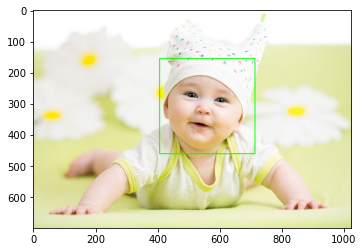

In [7]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

### Let us create a generalised function for the entire face detection process

In [8]:
def detect_faces(cascade, test_image, scaleFactor = 1.05):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0,0,255), 5)
        
    return image_copy

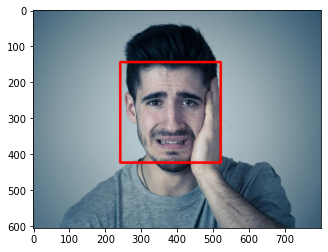

In [9]:
#loading image
test_image2 = cv2.imread('C:/Users/shch/Desktop/Face detection/face.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

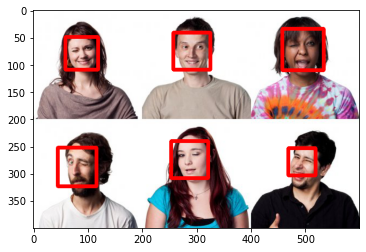

In [10]:
#loading image
test_image2 = cv2.imread('C:/Users/shch/Desktop/Face detection/group3.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

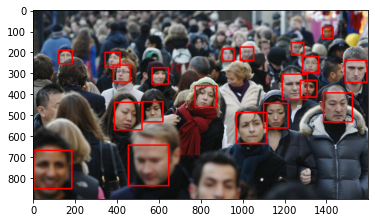

In [12]:
#loading image
test_image2 = cv2.imread('C:/Users/shch/Desktop/Face detection/crowd1.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))